In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

In [77]:
df = pd.read_csv('dataset.csv')

In [78]:
df

,Unnamed: 0,school,sex,age,famsize,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,health,absences,G1,G2,G3,exam,verdict
0,0,GP,F,18,GT3,4,4,at_home,teacher,mother,2,2,3,6,5,6,6,5.666667,0
1,1,GP,F,17,GT3,1,1,at_home,other,father,1,2,3,4,5,5,6,5.333333,0
2,2,GP,F,15,LE3,1,1,at_home,other,mother,1,2,3,10,7,8,10,8.333333,0
3,3,GP,F,15,GT3,4,2,health,services,mother,1,3,5,2,15,14,15,14.666667,1
4,4,GP,F,16,GT3,3,3,other,other,father,1,2,5,4,6,10,10,8.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,390,MS,M,20,LE3,2,2,services,services,other,1,2,4,11,9,9,9,9.000000,0
391,391,MS,M,17,LE3,3,1,services,services,mother,2,1,2,3,14,16,16,15.333333,1
392,392,MS,M,21,GT3,1,1,other,other,other,1,1,3,3,10,8,7,8.333333,0
393,393,MS,M,18,LE3,3,2,services,other,mother,3,1,5,0,11,12,10,11.000000,1


Now let's understand those columns

school - student’s school (binary: ‘GP’ - Gabriel Pereira or ‘MS’ - Mousinho da Silveira)

sex - student’s sex (binary: ‘F’ - female or ‘M’ - male)

age - student’s age (numeric: from 15 to 22)

address - student’s home address type (binary: ‘U’ - urban or ‘R’ - rural)

famsize - family size (binary: ‘LE3’ - less or equal to 3 or ‘GT3’ - greater than 3)

Pstatus - parent’s cohabitation status (binary: ‘T’ - living together or ‘A’ - apart)

Medu - mother’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

Fedu - father’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

Mjob - mother’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)

Fjob - father’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)

reason - reason to choose this school (nominal: close to ‘home’, school ‘reputation’, ‘course’ preference or ‘other’)

guardian - student’s guardian (nominal: ‘mother’, ‘father’ or ‘other’)

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

In [79]:
df.shape

(395, 19)

In [80]:
df.columns

Index(['Unnamed: 0', 'school', 'sex', 'age', 'famsize', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'guardian', 'traveltime', 'studytime', 'health', 'absences',
       'G1', 'G2', 'G3', 'exam', 'verdict'],
      dtype='object')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  395 non-null    int64  
 1   school      395 non-null    object 
 2   sex         395 non-null    object 
 3   age         395 non-null    int64  
 4   famsize     395 non-null    object 
 5   Medu        395 non-null    int64  
 6   Fedu        395 non-null    int64  
 7   Mjob        395 non-null    object 
 8   Fjob        395 non-null    object 
 9   guardian    395 non-null    object 
 10  traveltime  395 non-null    int64  
 11  studytime   395 non-null    int64  
 12  health      395 non-null    int64  
 13  absences    395 non-null    int64  
 14  G1          395 non-null    int64  
 15  G2          395 non-null    int64  
 16  G3          395 non-null    int64  
 17  exam        395 non-null    float64
 18  verdict     395 non-null    int64  
dtypes: float64(1), int64(12), obj

In [82]:
df.describe()

,Unnamed: 0,age,Medu,Fedu,traveltime,studytime,health,absences,G1,G2,G3,exam,verdict
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.00000
mean,197.000000,16.696203,2.749367,2.521519,1.448101,2.035443,3.554430,5.708861,10.908861,10.713924,10.415190,10.679325,0.58481
std,114.170924,1.276043,1.094735,1.088201,0.697505,0.839240,1.390303,8.003096,3.319195,3.761505,4.581443,3.696786,0.49338
min,0.000000,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.333333,0.00000
25%,98.500000,16.000000,2.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,8.333333,0.00000
50%,197.000000,17.000000,3.000000,2.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,10.666667,1.00000
75%,295.500000,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,8.000000,13.000000,13.000000,14.000000,13.333333,1.00000
max,394.000000,22.000000,4.000000,4.000000,4.000000,4.000000,5.000000,75.000000,19.000000,19.000000,20.000000,19.333333,1.00000


In [83]:
df.columns

Index(['Unnamed: 0', 'school', 'sex', 'age', 'famsize', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'guardian', 'traveltime', 'studytime', 'health', 'absences',
       'G1', 'G2', 'G3', 'exam', 'verdict'],
      dtype='object')

In [84]:
df.isnull().sum()

Unnamed: 0    0
school        0
sex           0
age           0
famsize       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
guardian      0
traveltime    0
studytime     0
health        0
absences      0
G1            0
G2            0
G3            0
exam          0
verdict       0
dtype: int64

In [85]:
df

,Unnamed: 0,school,sex,age,famsize,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,health,absences,G1,G2,G3,exam,verdict
0,0,GP,F,18,GT3,4,4,at_home,teacher,mother,2,2,3,6,5,6,6,5.666667,0
1,1,GP,F,17,GT3,1,1,at_home,other,father,1,2,3,4,5,5,6,5.333333,0
2,2,GP,F,15,LE3,1,1,at_home,other,mother,1,2,3,10,7,8,10,8.333333,0
3,3,GP,F,15,GT3,4,2,health,services,mother,1,3,5,2,15,14,15,14.666667,1
4,4,GP,F,16,GT3,3,3,other,other,father,1,2,5,4,6,10,10,8.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,390,MS,M,20,LE3,2,2,services,services,other,1,2,4,11,9,9,9,9.000000,0
391,391,MS,M,17,LE3,3,1,services,services,mother,2,1,2,3,14,16,16,15.333333,1
392,392,MS,M,21,GT3,1,1,other,other,other,1,1,3,3,10,8,7,8.333333,0
393,393,MS,M,18,LE3,3,2,services,other,mother,3,1,5,0,11,12,10,11.000000,1


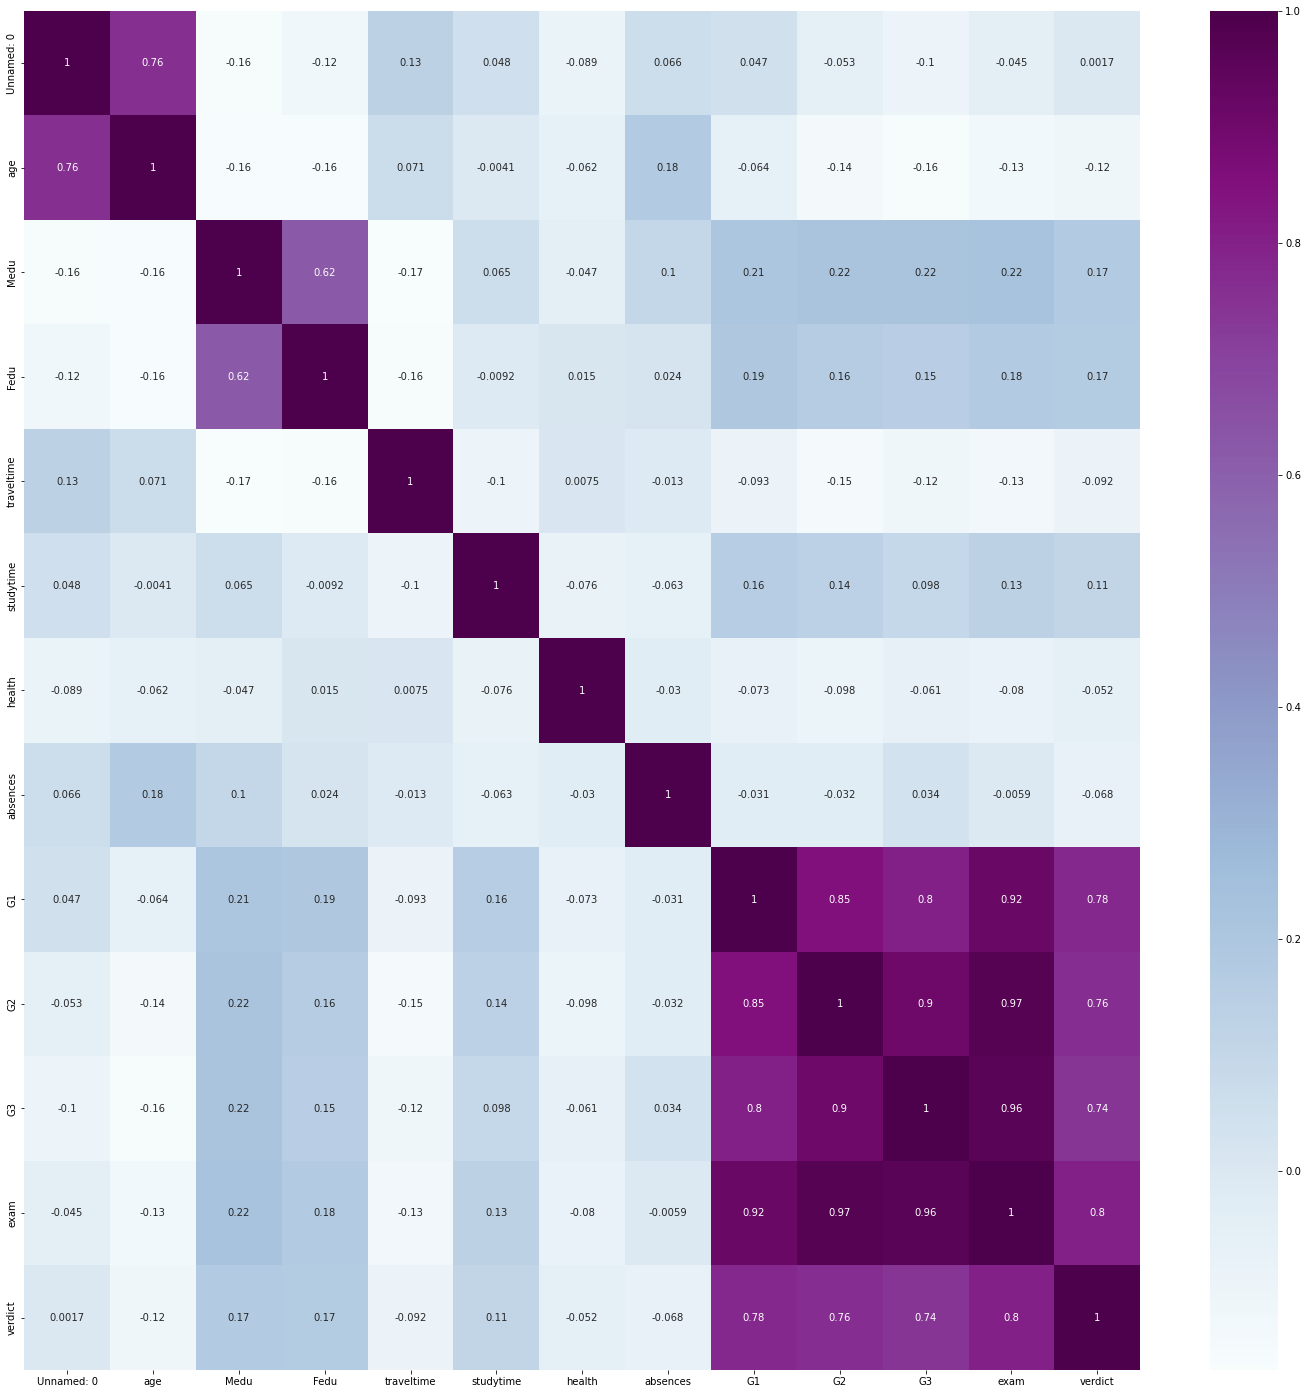

In [86]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),cmap="BuPu",annot=True)
plt.show()

Text(0.5, 1.0, 'Age Distribution')

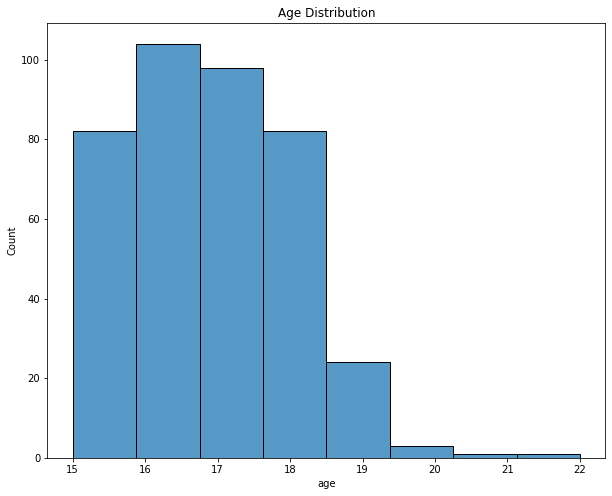

In [87]:
plt.figure(figsize=(10,8))
sns.histplot(data = df, x='age', bins=8)
plt.title('Age Distribution')

As you get older, the chances of success decrease

Text(0.5, 1.0, 'Father Education')

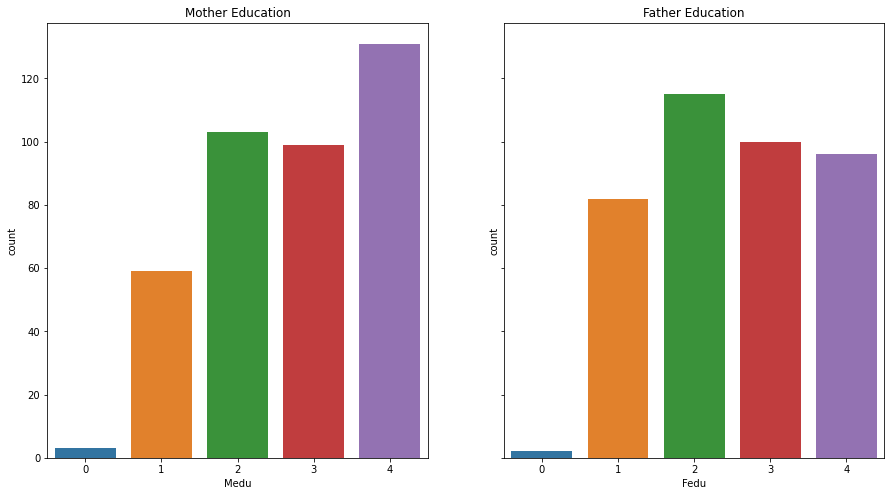

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8),sharey=True)


sns.countplot(ax=axes[0], data = df, x='Medu')
axes[0].set_title('Mother Education')


sns.countplot(ax=axes[1], data = df, x='Fedu')
axes[1].set_title('Father Education')

Most of mothers, have a higher level of education and most of father have medium level of education. 

Text(0.5, 1.0, 'Study time')

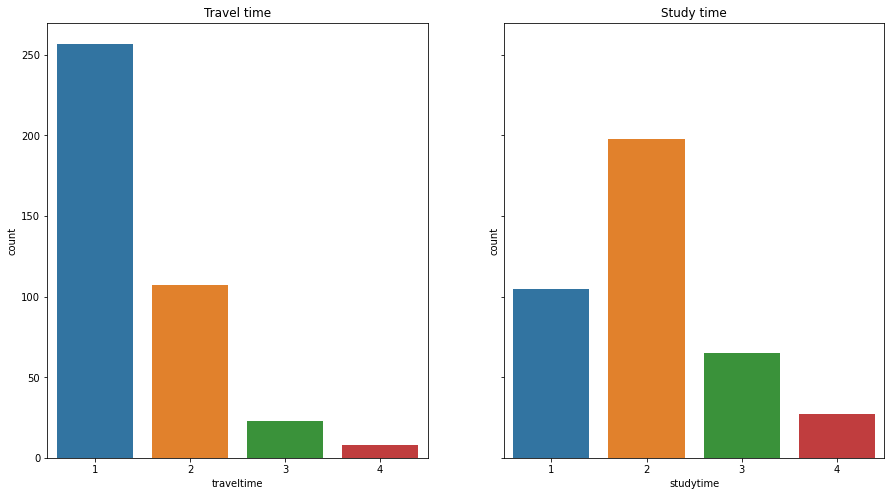

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
order2 = [1,2,3,4]

sns.countplot(ax=axes[0], data = df, x='traveltime', order=order2)
axes[0].set_title('Travel time')


sns.countplot(ax=axes[1], data = df, x='studytime', order=order2)
axes[1].set_title('Study time')

The students of our dataset often 1 travel time and often 2 study time

Text(0.5, 1.0, 'Health')

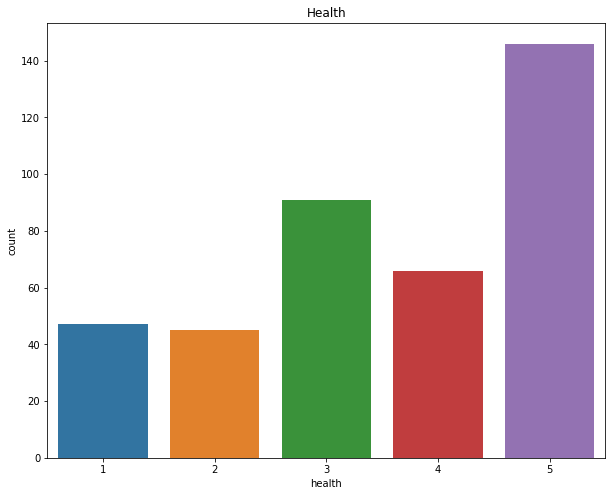

In [90]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x='health')
plt.title('Health')

Most of our students have a good health

Text(0.5, 1.0, 'Absences Distributiion')

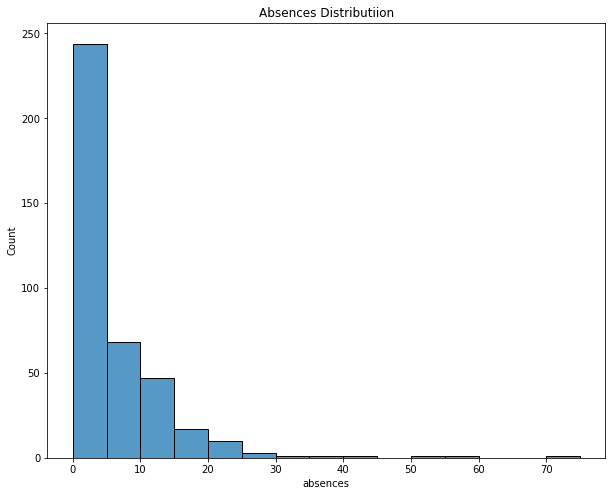

In [91]:
plt.figure(figsize=(10,8))
sns.histplot(data = df, x='absences', bins=15)
plt.title('Absences Distributiion')

Text(0.5, 1.0, 'final grade')

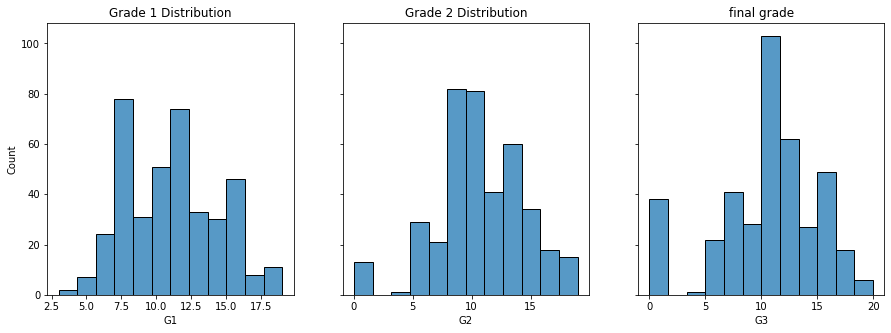

In [92]:
fig, axes = plt.subplots(1, 3, figsize=(15,5),sharey=True)


sns.histplot(ax=axes[0], data = df, x='G1', bins = 12)
axes[0].set_title('Grade 1 Distribution')


sns.histplot(ax=axes[1], data = df, x='G2', bins = 12)
axes[1].set_title('Grade 2 Distribution')


sns.histplot(ax=axes[2], data = df, x='G3', bins = 12)
axes[2].set_title('final grade')

Text(0.5, 1.0, 'Exam Distribution')

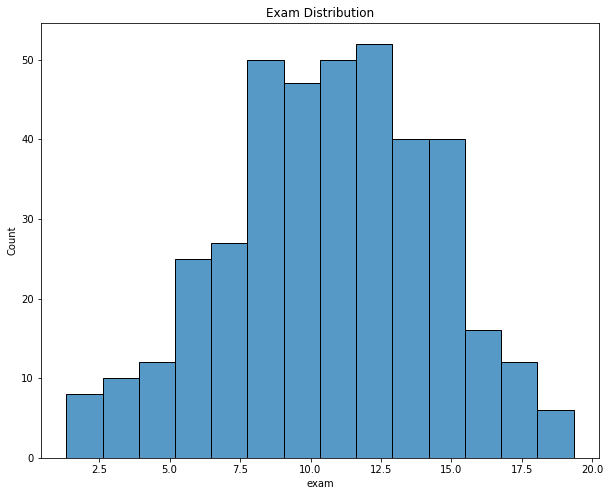

In [93]:
plt.figure(figsize=(10,8))
sns.histplot(data = df, x='exam')
plt.title('Exam Distribution')

we can see that we have more success than fail to the exam

Text(0.5, 1.0, 'Age influence to exam score')

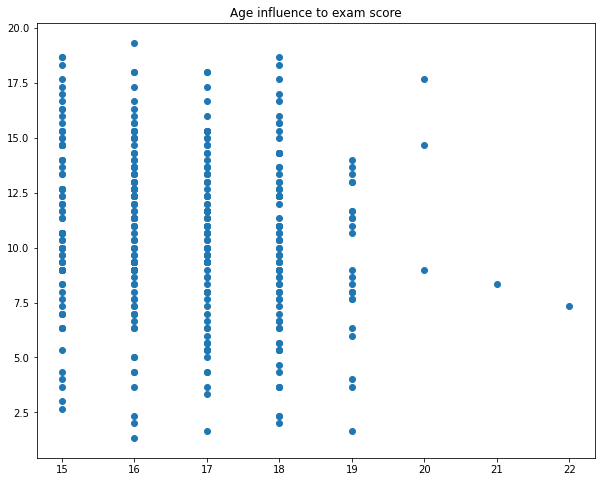

In [94]:
plt.figure(figsize=(10,8))
plt.scatter( x=df.age, y=df.exam)
plt.title('Age influence to exam score')

Text(0.5, 1.0, 'Student success considering father education level')

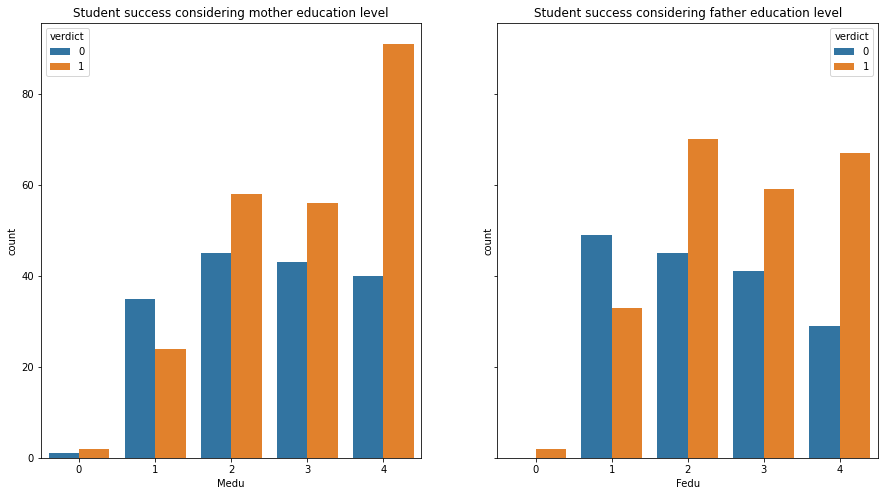

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8),sharey=True)

# Medu
sns.countplot(ax=axes[0], data = df, x='Medu', hue='verdict')
axes[0].set_title('Student success considering mother education level')

# Fedu
sns.countplot(ax=axes[1], data = df, x='Fedu', hue='verdict')
axes[1].set_title('Student success considering father education level')

with well educated parents, students will succeed

In [96]:
df.isnull().sum().sum()

0

In [97]:
x=df[['G1', 'G2', 'G3','verdict']] 
y=df['exam']  
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [98]:
lr = LinearRegression() 
lr.fit(x_train,y_train)

LinearRegression()

In [99]:
lr.score(x_test, y_test)


1.0

In [100]:
plr = LinearRegression() 
poly = PolynomialFeatures(degree = 2) 
x_=poly.fit_transform(x_train)
plr.fit(x_, y_train) 

LinearRegression()

In [101]:
x_test_=poly.fit_transform(x_test)
plr.score(x_test_, y_test)

1.0

In [102]:
df.shape

(395, 19)